In [1]:
import toolkit as tk
import vmbench as vb

benchmark = "VM"
base = "classic"
target = "sputnik"
benchlist = [base, target]
Q = [list(tk.run_benchmark(benchmark, benchlist, pprof=tk.BENCHMARK_PPROF))]

in the dir C:\Projects\_GoPkg_\src\github.com\sudachen\playground\branch\classic\benchmarks\benchvm
	executing: go run benchmark.go --pprof --cpuprof=benchmark.pprof
in the dir C:\Projects\_GoPkg_\src\github.com\sudachen\playground\branch\sputnik\benchmarks\benchvm
	executing: go run benchmark.go --pprof --cpuprof=benchmark.pprof


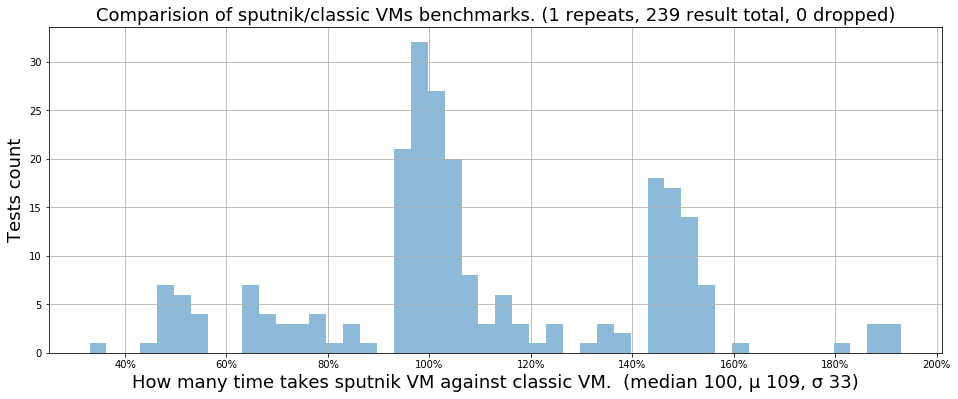

In [2]:
vb.plot_bench_hist(Q, base, target)

# TOP un-tagged calls

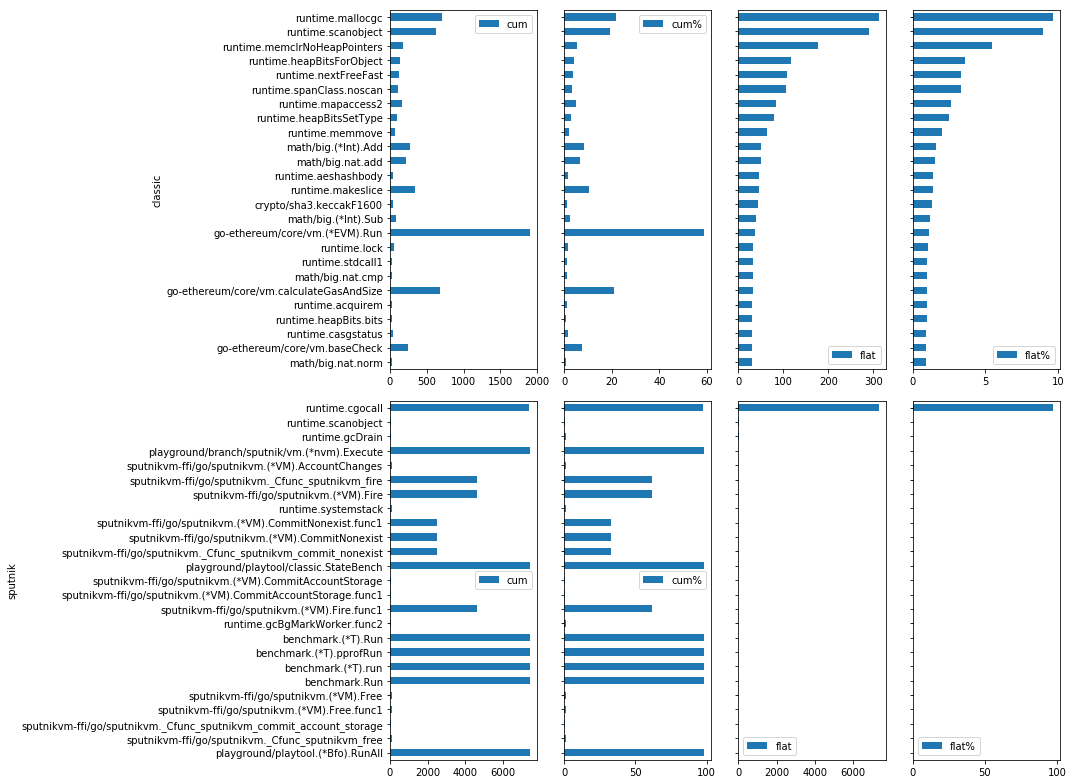

In [3]:
vb.plot_pprof('TOP un-tagged calls', 'top-all', Q, base, target)

# TOP tagged calls

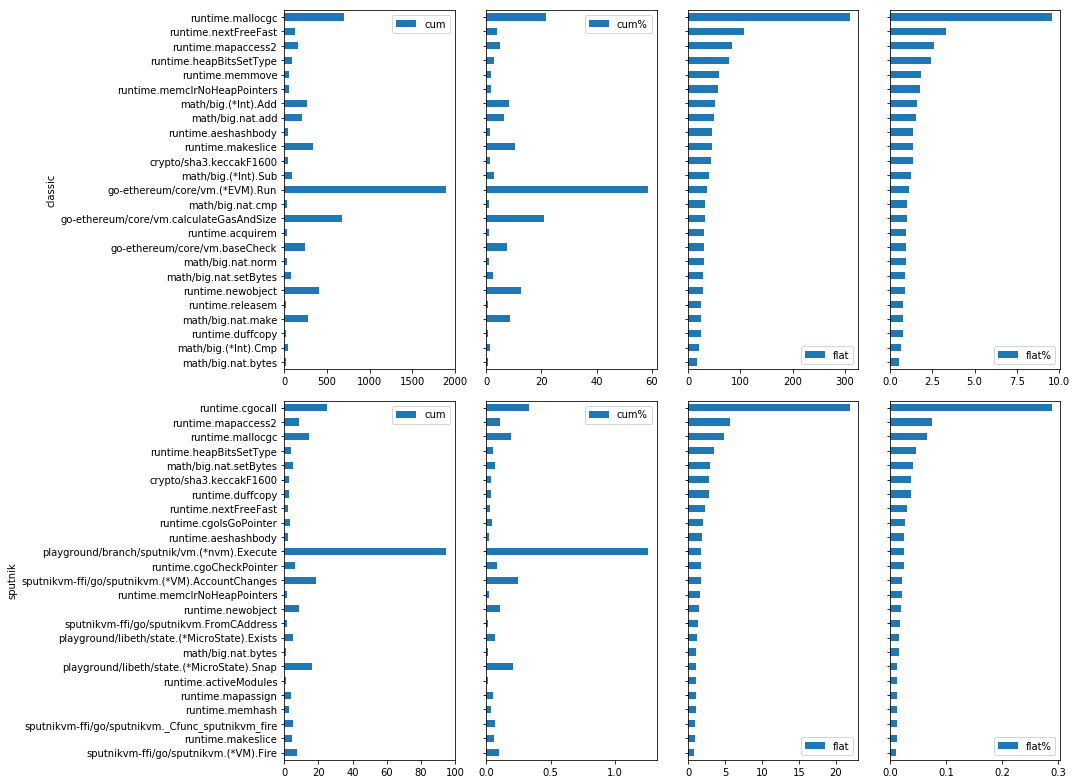

In [4]:
vb.plot_pprof('TOP tagged calls', 'top', Q, base, target)

in dir='C:\Projects\_GoPkg_\src\github.com\sudachen\playground\branch\classic\benchmarks\benchvm'
	executing: go tool pprof --png --nodecount=17 benchmark.pprof


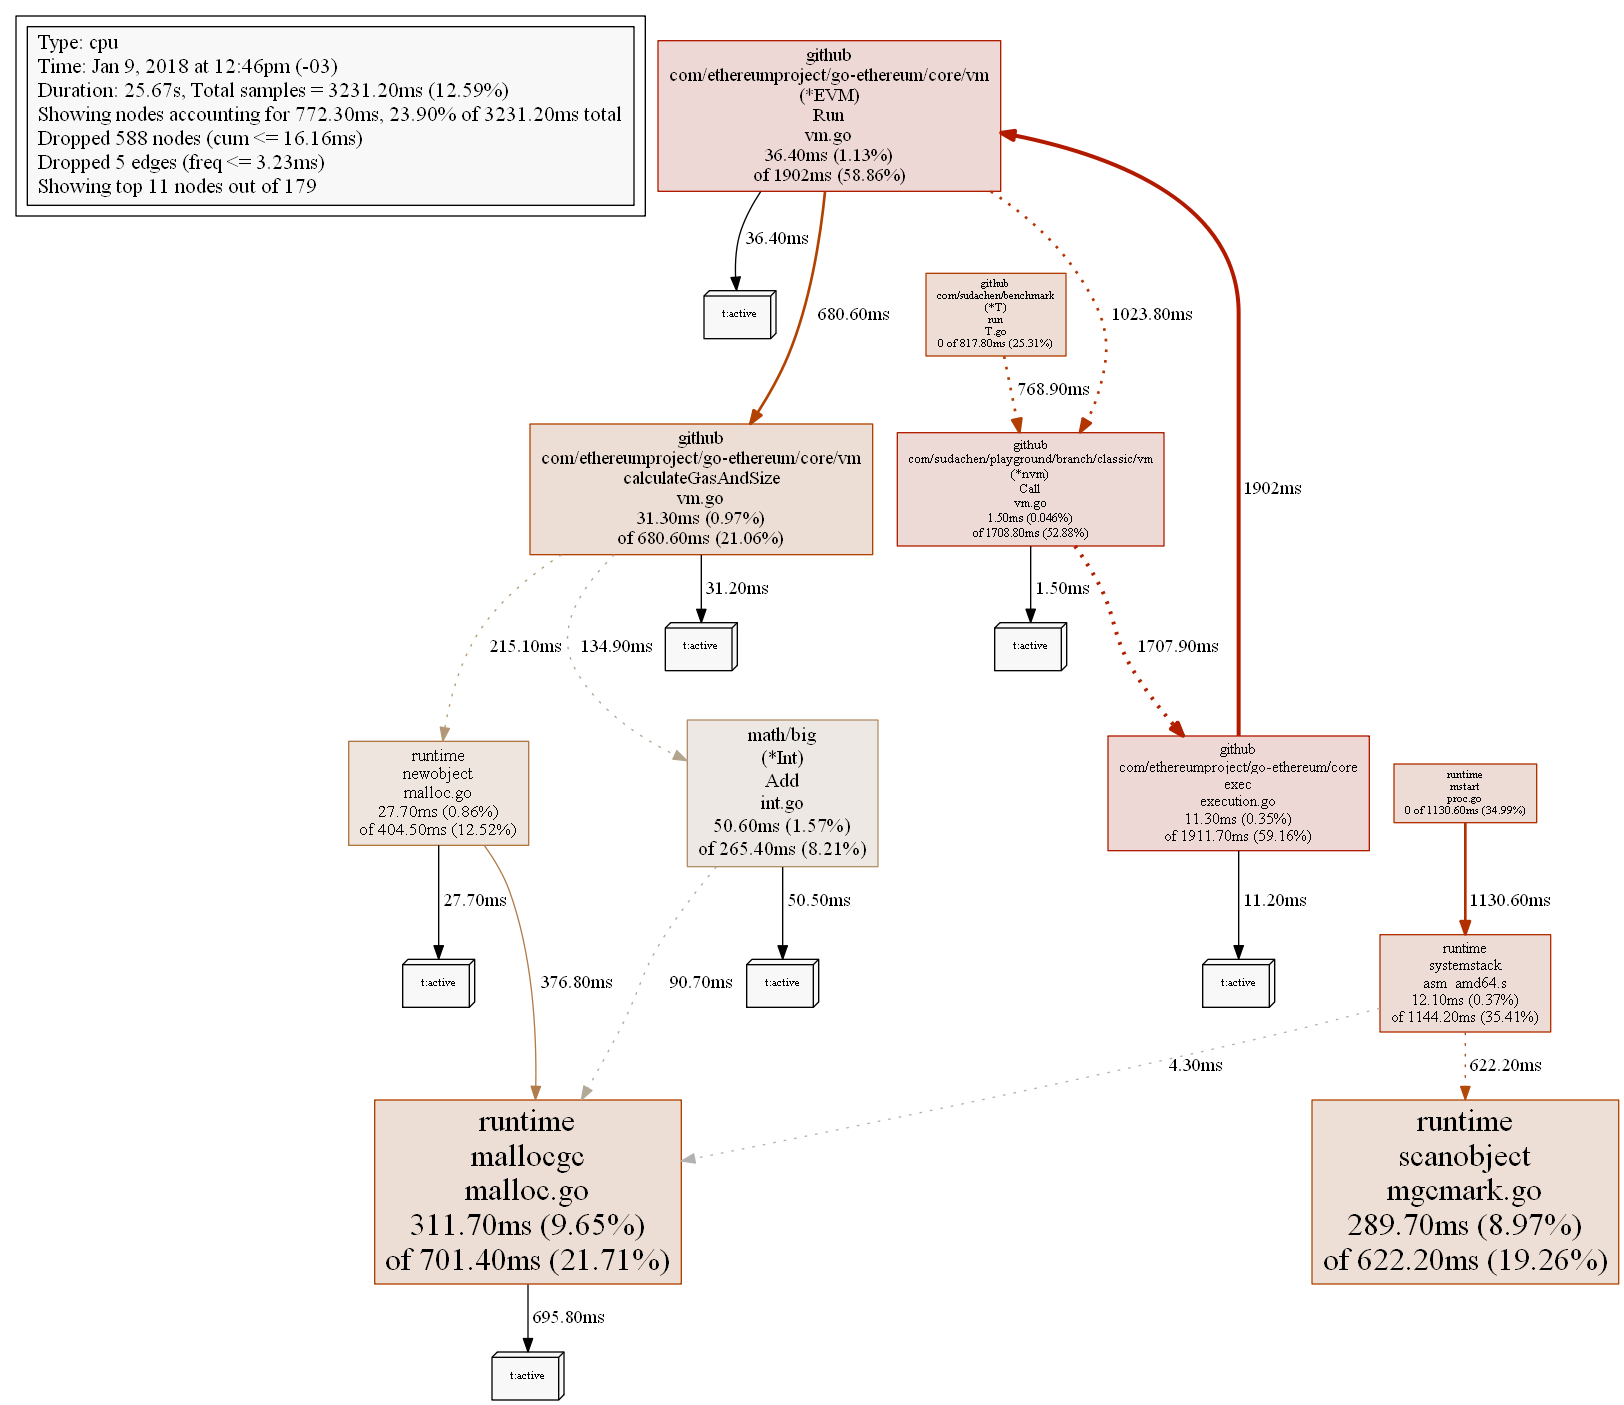

In [5]:
vb.plot_pprof_png(base,benchmark,17)

in dir='C:\Projects\_GoPkg_\src\github.com\sudachen\playground\branch\sputnik\benchmarks\benchvm'
	executing: go tool pprof --png --nodecount=20 benchmark.pprof


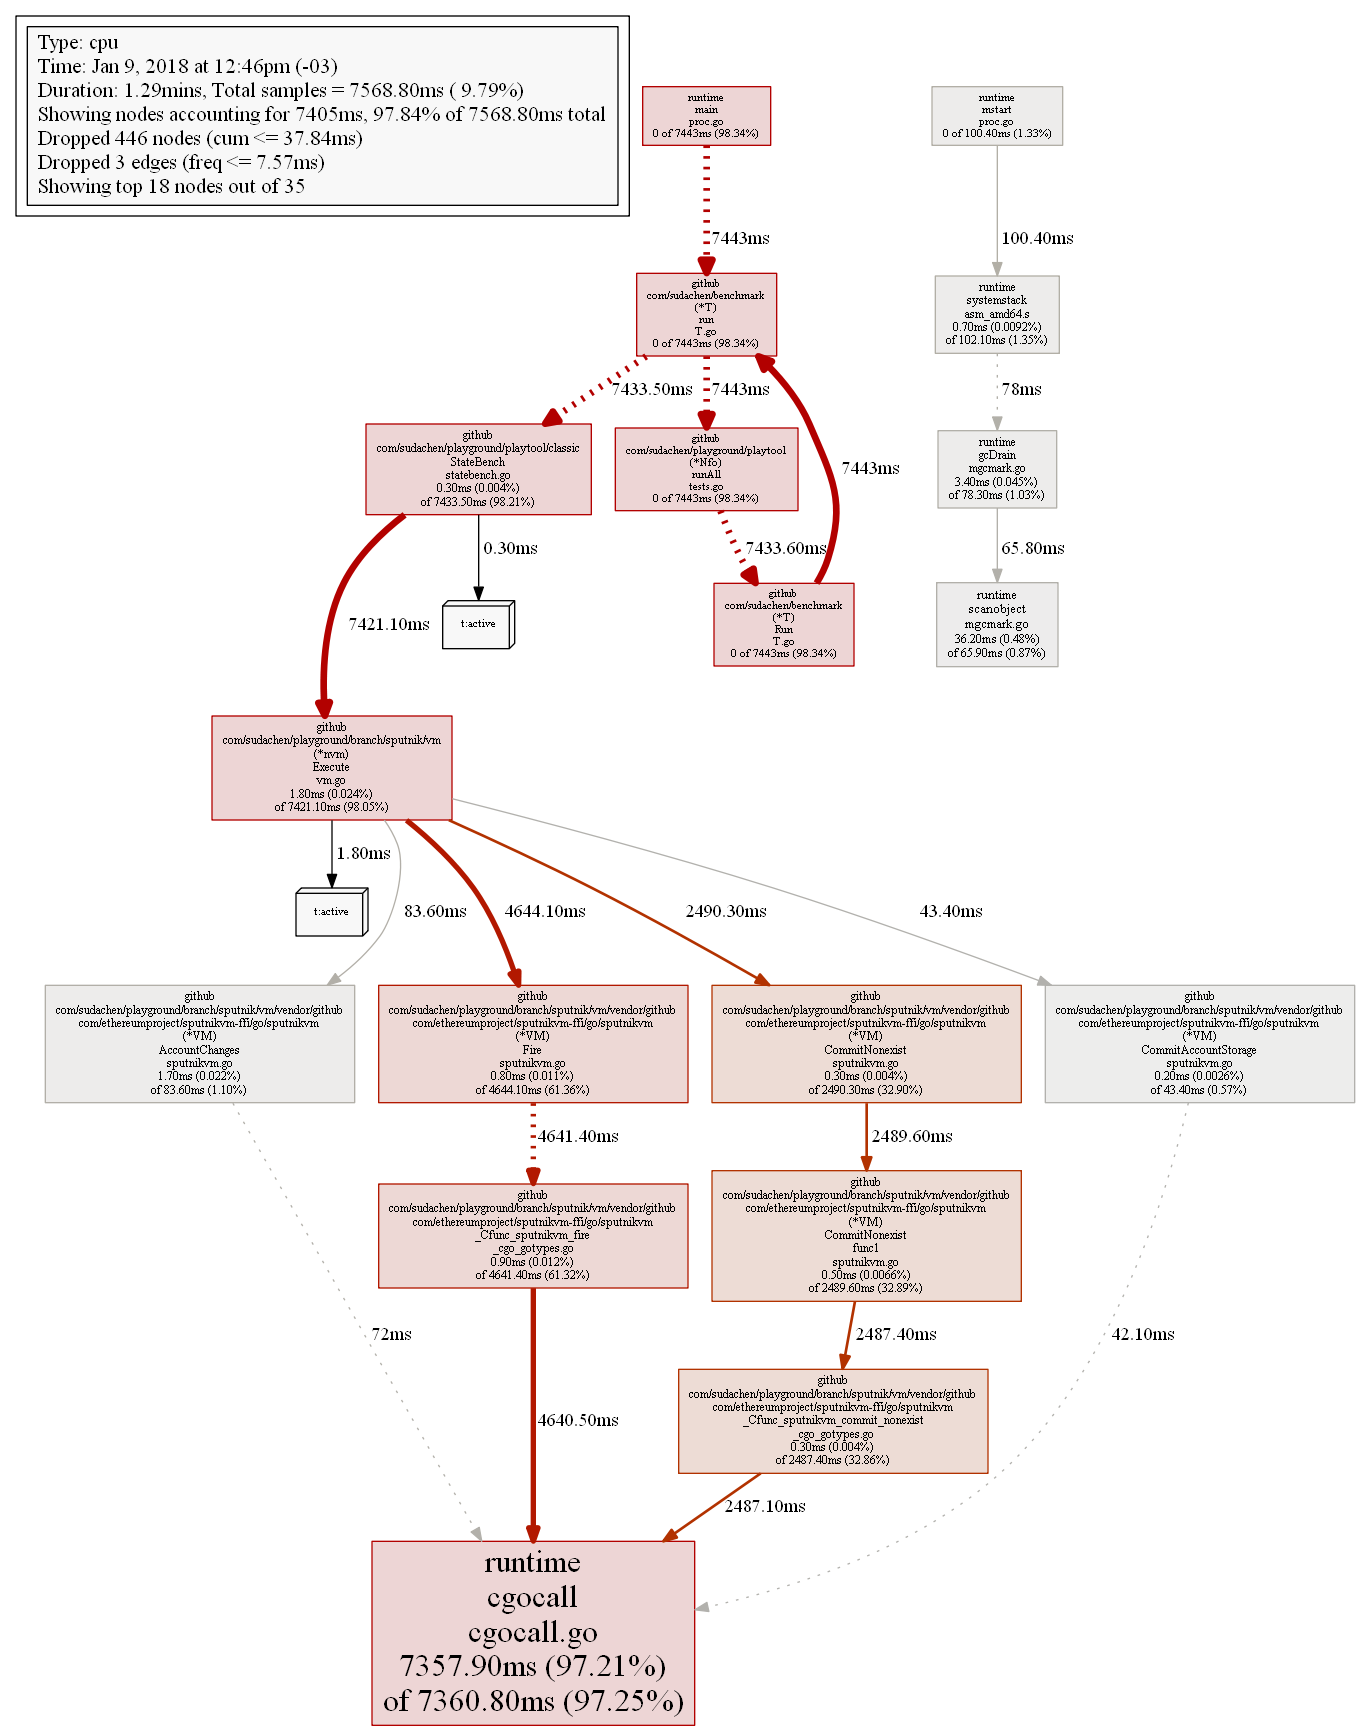

In [6]:
vb.plot_pprof_png(target,benchmark,20)